<a href="https://colab.research.google.com/github/azavalac/SFH_dwarf_galaxies/blob/main/ProyectoModulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#instalamos artpop
!pip install artpop

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

import artpop

# artpop's matplotlib style
plt.style.use(artpop.mpl_style)

# use this random state for reproducibility
rng = np.random.RandomState(112)

BLOQUE CON LA FUNCION QUE DEVUELVE UN CSP A PARTIR DE 2 LISTAS CON EDADES Y SFR

In [62]:
#BLOQUE CON LA FUNCION QUE DEVUELVE UN CSP A PARTIR DE 2 LISTAS CON EDADES Y SFR

#sfh_to_ssp: list x list -> csp
#
#
def shf_to_ssp(sfh):
  array_ssp = []

  for i in range(sfh.shape[1]):
    edad = sfh[0][i]
    sfr = sfh[1][i]
    #print(edad)
    #print("edad en log age: ", np.log10(edad))
    #print("sfr: ", sfr)

    ssp = artpop.MISTSSP(
      log_age = np.log10(edad), # log of age in years
      num_stars = sfr,      # number of stars
      feh = -1,             # metallicity [Fe/H]
      phot_system = 'LSST', # photometric system(s)
      random_state = rng,   # random state for reproducibility
    )

    array_ssp.append(ssp)

  csp = array_ssp[0]

  for i in range(1, len(array_ssp)):
    csp = csp + array_ssp[i]

  return csp

In [63]:
sfh_test = np.array([[1e8, 2e9, 7e9], [2e5, 1e3, 2e2]]) #edades en Gyr x SFR

csp = shf_to_ssp(sfh_test)

In [64]:
def create_csp(array_ages, array_sfr):
   csp = 0

   for i in range(len(array_ages)):
        # crear población con array_ages[i] y array_sfr[i]
        age = array_ages[i]
        sfr = array_sfr[i]
        # añadirla al conjunto de poblaciones csp
        #falta esto
   return csp

#ejemplo
ages = np.log10(np.array([1e8, 2e9, 7e9]))  # Edades en log10 años
sfr = np.array([2e5, 1e6, 2e4])
csp_result = create_csp(ages, sfr)

**SFH**

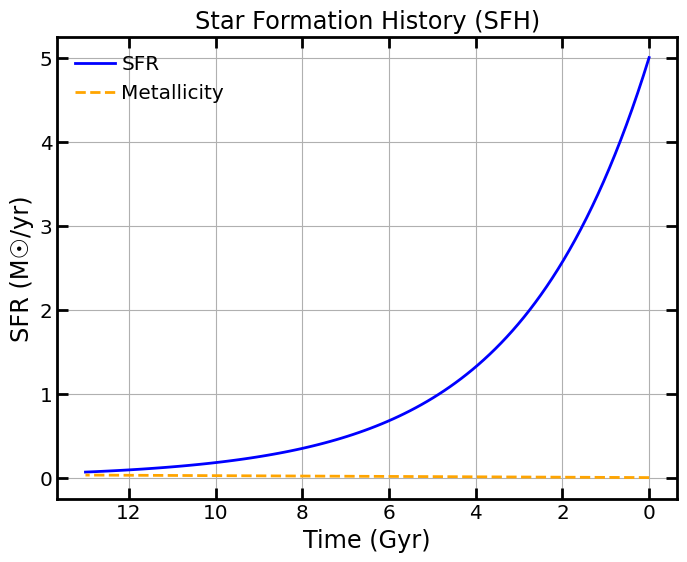

In [ ]:
import matplotlib.pyplot as plt
def plot_sfh(ages, sfr, metallicity=None, xlabel='Time (Gyr)', ylabel='SFR (M☉/yr)', title='Star Formation History (SFH)'):
    """
    Función genérica para plotear un SFH basado en una CSP (Composite Stellar Population).

    Parámetros:
    - ages: lista o arreglo de edades (en Gyr o cualquier unidad de tiempo relevante).
    - sfr: lista o arreglo de la tasa de formación estelar (SFR) correspondiente a cada edad.
    - metallicity: opcional, lista o arreglo de metalicidades correspondiente a cada edad.
    - xlabel: etiqueta del eje x (por defecto 'Time (Gyr)').
    - ylabel: etiqueta del eje y (por defecto 'SFR (M☉/yr)').
    - title: título del gráfico.
    """

    # Convertir los inputs a numpy arrays para mayor flexibilidad
    ages = np.array(ages)
    sfr = np.array(sfr)

    # Crear el plot básico
    plt.figure(figsize=(8, 6))
    plt.plot(ages, sfr, label='SFR', color='blue', lw=2)

    # Si se proporciona la metalicidad, hacer un gráfico adicional
    # Esto va de extra
    if metallicity is not None:
        metallicity = np.array(metallicity)
        plt.plot(ages, metallicity, label='Metallicity', color='orange', lw=2, linestyle='--')

    # Personalizar el gráfico
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.gca().invert_xaxis()  # invierte el eje de tiempo si es necesario (para que el tiempo "avanzado" esté a la derecha)
    plt.show()

# Ejemplo de uso
ages = np.linspace(0, 13, 100)  # Edad desde 0 a 13 Gyr
sfr = np.exp(-ages/3) * 5  # Ejemplo de una SFR decreciente exponencialmente
metallicity = np.linspace(0.0001, 0.03, 100)  # Ejemplo de metalicidad creciente

plot_sfh(ages, sfr, metallicity)


In [ ]:
#SSP Y CSP DE PRUEBA

ssp_old = artpop.MISTSSP(
    log_age = 10.1,       # log of age in years
    feh = -1,           # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 5e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_intermediate = artpop.MISTSSP(
    log_age = 9.5,        # log of age in years
    feh = -1,             # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e5,      # number of stars
    random_state = rng,   # random state for reproducibility
)

ssp_young = artpop.MISTSSP(
    log_age = 8.5,        # log of age in years
    feh = -1,              # metallicity [Fe/H]
    phot_system = 'LSST', # photometric system(s)
    num_stars = 1e4,      # number of stars
    random_state = rng,   # random state for reproducibility
)

csp = ssp_old + ssp_intermediate + ssp_young

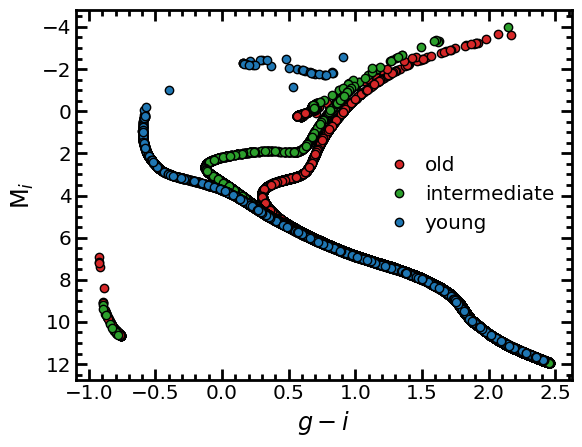

In [ ]:
i = csp.star_mags('LSST_i')
g = csp.star_mags('LSST_g')

old = csp.ssp_labels == 1
med = csp.ssp_labels == 2
young = csp.ssp_labels == 3

plt.plot(g[old] - i[old], i[old], 'o',
         c='tab:red', mec='k', label='old')
plt.plot(g[med] - i[med], i[med], 'o',
         c='tab:green', mec='k', label='intermediate')
plt.plot(g[young] - i[young], i[young], 'o',
         c='tab:blue', mec='k', label='young')

plt.legend(loc='center right')
plt.minorticks_on()
plt.gca().invert_yaxis()
plt.xlabel(r'$g-i$')
plt.ylabel(r'M$_i$');

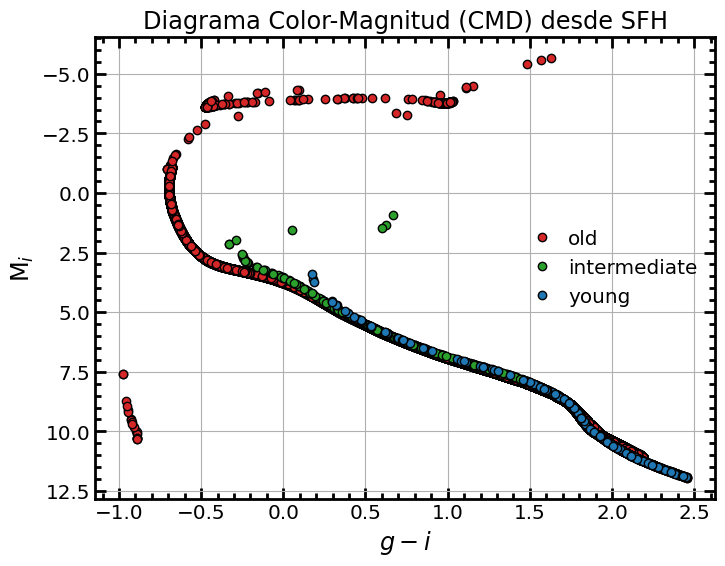

In [65]:
def plot_cmd_from_sfh(sfh): # Funcion que plotea el CMD dado un SFH
    """
    Genera y grafica el CMD a partir de una SFH, mostrando poblaciones antiguas, intermedias y jóvenes.
    """
    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_ssp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Definir etiquetas para clasificar las estrellas según la edad
    old = csp.ssp_labels == 1       # Población antigua
    med = csp.ssp_labels == 2       # Población intermedia
    young = csp.ssp_labels == 3     # Población joven

    # Crear el gráfico del CMD
    plt.figure(figsize=(8, 6))
    plt.plot(g_mags[old] - i_mags[old], i_mags[old], 'o', c='tab:red', mec='k', label='old')
    plt.plot(g_mags[med] - i_mags[med], i_mags[med], 'o', c='tab:green', mec='k', label='intermediate')
    plt.plot(g_mags[young] - i_mags[young], i_mags[young], 'o', c='tab:blue', mec='k', label='young')

    # Configurar etiquetas y formato del gráfico
    plt.legend(loc='center right')
    plt.minorticks_on()
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Diagrama Color-Magnitud (CMD) desde SFH')
    plt.grid(True)
    plt.show()

# Llamar a la función con sfh_test
plot_cmd_from_sfh(sfh_test)

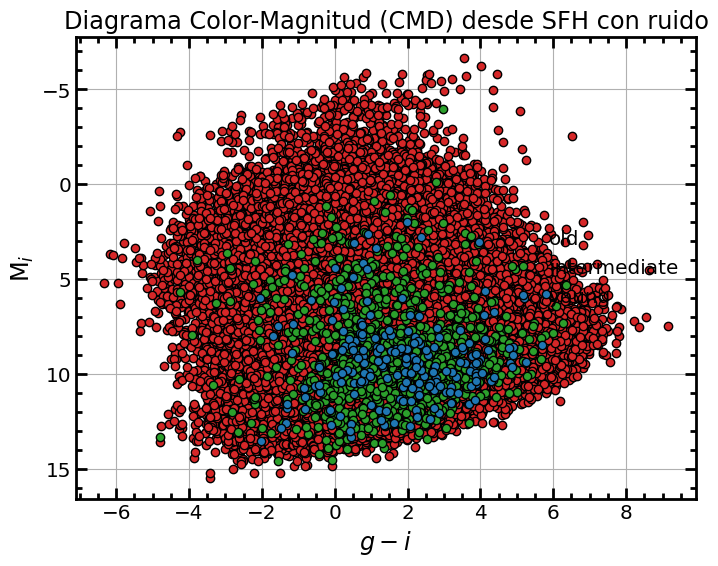

In [66]:
def calcular_error_magnitud(F):
    return 1.09 / np.sqrt(F)

def plot_cmd_from_sfh(sfh): # Genera y grafica el CMD a partir de una SFH, mostrando poblaciones antiguas, intermedias y jóvenes, incluyendo ruido en las magnitudes.

    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_ssp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Suponemos que el flujo es proporcional a la magnitud en cada banda
    flujo_i = 10 ** (-0.0005 * i_mags)  # Convertir magnitudes a flujos aproximados para calcular el error
    flujo_g = 10 ** (-0.0005 * g_mags)  #HAY QUE VARIAR ESTO PARA QUE NO SE VEA ASI

    # Calcular el ruido en magnitudes
    i_noise = calcular_error_magnitud(flujo_i) * np.random.normal(0, 1, len(i_mags))
    g_noise = calcular_error_magnitud(flujo_g) * np.random.normal(0, 1, len(g_mags))

    # Agregar el ruido a las magnitudes
    i_mags_noisy = i_mags + i_noise
    g_mags_noisy = g_mags + g_noise

    # Definir etiquetas para clasificar las estrellas según la edad
    old = csp.ssp_labels == 1       # Población antigua
    med = csp.ssp_labels == 2       # Población intermedia
    young = csp.ssp_labels == 3     # Población joven

    # Crear el gráfico del CMD con ruido agregado
    plt.figure(figsize=(8, 6))
    plt.plot(g_mags_noisy[old] - i_mags_noisy[old], i_mags_noisy[old], 'o', c='tab:red', mec='k', label='old')
    plt.plot(g_mags_noisy[med] - i_mags_noisy[med], i_mags_noisy[med], 'o', c='tab:green', mec='k', label='intermediate')
    plt.plot(g_mags_noisy[young] - i_mags_noisy[young], i_mags_noisy[young], 'o', c='tab:blue', mec='k', label='young')

    # Configurar etiquetas y formato del gráfico
    plt.legend(loc='center right')
    plt.minorticks_on()
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Diagrama Color-Magnitud (CMD) desde SFH con ruido')
    plt.grid(True)
    plt.show()

plot_cmd_from_sfh(sfh_test)

Histograma 2D (revisar si está bien)

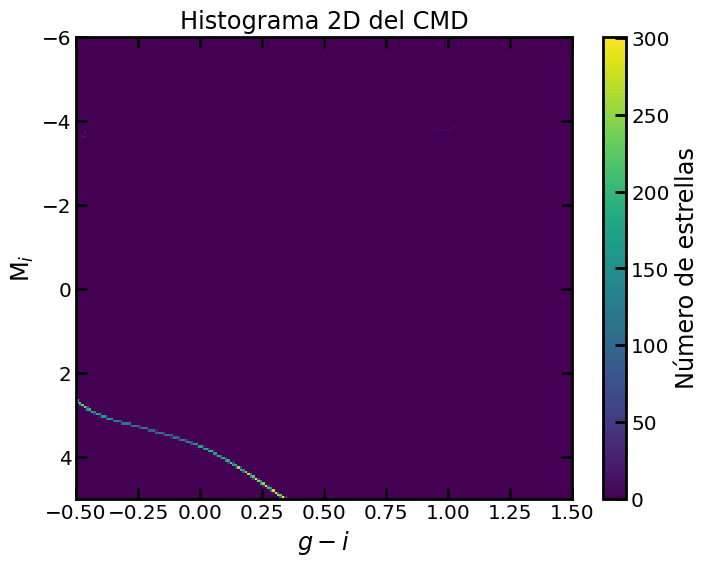

In [67]:
def plot_cmd_histogram_from_sfh(sfh): # Genera y grafica el histograma 2D del CMD a partir de una SFH.

    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_ssp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Calcular el color (g - i)
    color_g_i = g_mags - i_mags

    # Rango fijo para el histograma
    color_range = (-0.5, 1.5)  # Rango de color (g - i)
    mag_range = (-6, 5)        # Rango de magnitud i

    # Crear el histograma 2D
    plt.figure(figsize=(8, 6))
    plt.hist2d(color_g_i, i_mags, bins=200, range=[color_range, mag_range], cmap='viridis')

    # Configurar etiquetas y formato del gráfico
    plt.colorbar(label='Número de estrellas')
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Histograma 2D del CMD')
    plt.grid(False)
    plt.show()

plot_cmd_histogram_from_sfh(sfh_test)

Grilla (revisar si esta bien)


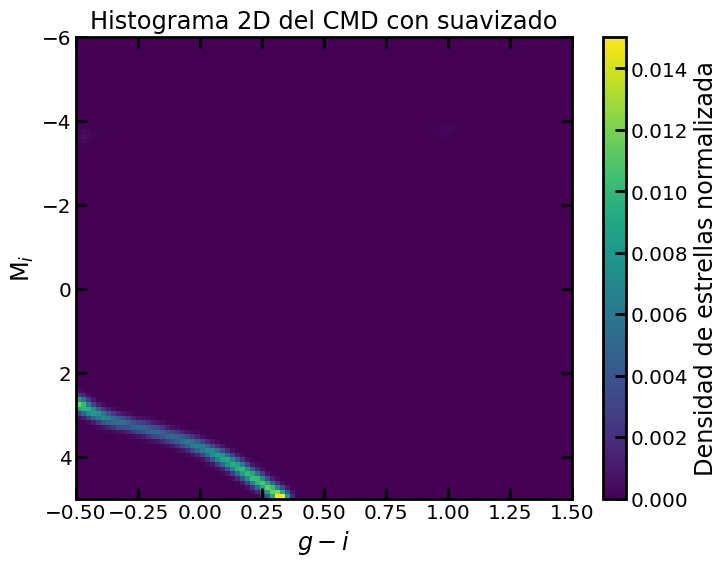

In [68]:
from scipy.ndimage import gaussian_filter

def Grilla_de_SFH(sfh): # Genera y grafica el histograma 2D normalizado y suavizado del CMD a partir de una SFH.

    # Generar la población estelar compuesta (CSP) a partir del SFH
    csp = shf_to_ssp(sfh)

    # Obtener magnitudes en las bandas i y g del sistema LSST
    i_mags = csp.star_mags('LSST_i')
    g_mags = csp.star_mags('LSST_g')

    # Calcular el color (g - i)
    color_g_i = g_mags - i_mags

    # Rango fijo para el histograma
    color_range = (-0.5, 1.5)  # Rango de color (g - i)
    mag_range = (-6, 5)        # Rango de magnitud i

    # Crear el histograma 2D
    hist, xedges, yedges = np.histogram2d(color_g_i, i_mags, bins=100, range=[color_range, mag_range])

    # Normalizar el histograma
    hist_normalized = hist / hist.sum()

    # Aplicar un filtro Gaussiano para suavizar
    hist_smoothed = gaussian_filter(hist_normalized, sigma=1)  # Puedes ajustar sigma según el nivel de suavizado deseado

    # Graficar el histograma 2D suavizado
    plt.figure(figsize=(8, 6))
    plt.imshow(hist_smoothed.T, extent=[color_range[0], color_range[1], mag_range[0], mag_range[1]],
               origin='lower', aspect='auto', cmap='viridis')

    # Configurar etiquetas y formato del gráfico
    plt.colorbar(label='Densidad de estrellas normalizada')
    plt.gca().invert_yaxis()  # Invertir el eje Y para magnitudes
    plt.xlabel(r'$g - i$')
    plt.ylabel(r'M$_i$')
    plt.title('Histograma 2D del CMD con suavizado')
    plt.grid(False)
    plt.show()

Grilla_de_SFH(sfh_test)

Creación de SFH (Danilo)

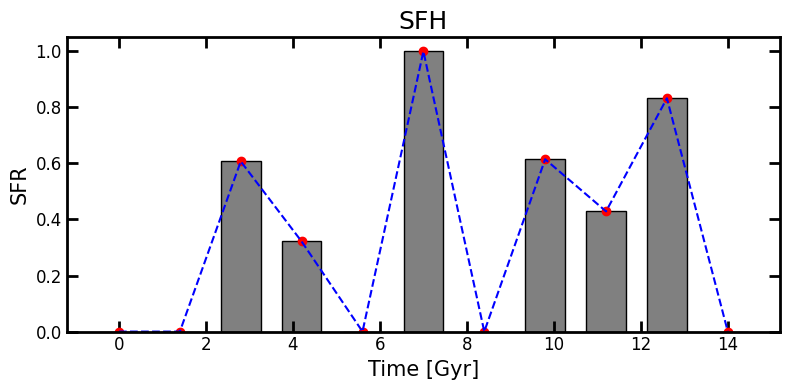

In [69]:

import numpy as np
import matplotlib.pyplot as plt

def create_sfh(n_points, H_noise=30):
    # Randomize amplitude and phase
    rho = np.random.rand(H_noise) * np.logspace(0.5, -2.5, H_noise)
    phi = np.random.rand(H_noise) * 2 * np.pi

    # Accumulate r(t) over t = [0, 2*pi]
    t = np.linspace(0, np.pi, n_points+1)
    r = np.ones_like(t)
    for h in range(1, H_noise + 1):
        r += rho[h - 1] * np.sin(h * t + phi[h - 1])

    # Update t to go from 0 to 14.
    t = t / np.pi * 14

    # Update r to go from 0 to 1
    r_mask = r < 0.6 # Esto es para tener regiones sin formación. Este parámetro se puede variar
    r = r/r.max()
    r[r_mask] = 0

    return r, t



def display_sfh(r, t):
    plt.figure(figsize=(8, 4))
    plt.title('SFH', fontsize=18)

    plt.bar(t, r, color='grey', width=10/len(t), edgecolor='black')
    plt.plot(t, r, 'ro')
    plt.plot(t, r, '--b')
    plt.xlabel('Time [Gyr]', fontsize=15)
    plt.ylabel('SFR', fontsize=15)

    plt.tick_params(axis='both', labelsize=12)
    plt.tight_layout()
    plt.show()

r, t = create_sfh(10, 100)
display_sfh(r, t)
sfhnew = np.array([r, t])

Prueba de create_SFH, probamos distintos valores para H_noise

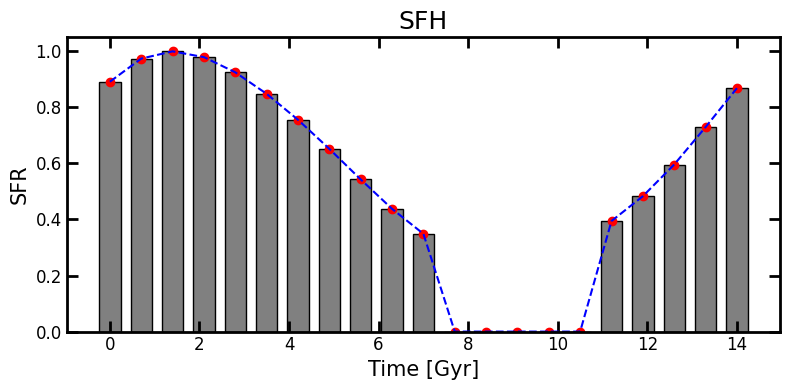

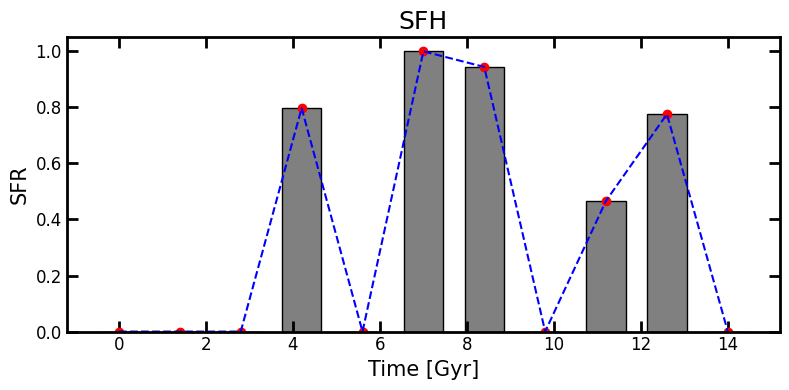

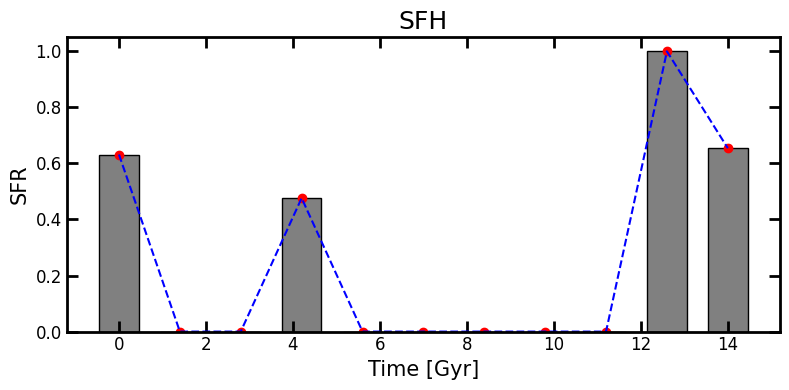

In [70]:
r, t = create_sfh(20, 7) # Probamos con un r=20 para tener mas puntos y t=7 el cual da pertubaciones mas suaves
display_sfh(r, t)

r, t = create_sfh(10, 150) # Probamos t=150 el cual da pertubaciones mas grandes
display_sfh(r, t)

r, t = create_sfh(10, 40) # Probamos t=1 el cual da pertubaciones mas pequeñas
display_sfh(r, t)

*Hay que probar si la 1ra función funciona con estos nuevos SFH